# Explicação do Código

O código realiza uma análise visual de matrizes de coocorrência entre intelectuais, criando gráficos de calor (heatmaps) a partir de dois conjuntos de dados.

## 1. Carregar e Processar os Dados
Os arquivos `IHGB.xlsx` e `Junta-Academia.xlsx` são carregados como DataFrames:
- **`ihgb_df` e `junta_academia_df`**: representam os dados originais.
- **Matrizes de coocorrência**:
  - O índice (`set_index`) é configurado para os nomes dos intelectuais.
  - A coluna "Source", se existir, é removida.
  - Valores não numéricos são convertidos para `NaN`, e zeros são substituídos por `NaN` para ocultação no gráfico.

## 2. Criar os Heatmaps
Dois gráficos de calor são gerados lado a lado com o `sns.heatmap`:
- **Heatmap IHGB**:
  - Mostra a matriz de coocorrência para o IHGB, com a paleta de cores azul.
  - Os números são exibidos nas células para valores diferentes de zero.
- **Heatmap Junta-Academia**:
  - Mostra a matriz de coocorrência para a Junta/Academia Nacional, com a paleta laranja.

## 3. Personalização dos Gráficos
- **Títulos e Rótulos**:
  - Cada gráfico possui título e rótulos nos eixos X e Y.
  - Os nomes dos intelectuais aparecem como rótulos nas matrizes.
- **Ajustes nos Rótulos**:
  - Os rótulos do eixo X estão inclinados (45 graus) para melhorar a legibilidade.
- **Espaçamento**:
  - O espaço entre os gráficos é ajustado com `wspace=0.01`.
  - O espaço inferior é ampliado para evitar sobreposição.

## 4. Exibição Final
Os gráficos são exibidos lado a lado com o comando `plt.show()`, destacando as relações entre os intelectuais nas duas fontes de dados.

## Aplicação
Este código é útil para visualizar comparativamente as relações entre intelectuais, permitindo identificar padrões e conexões entre eles em diferentes contextos (IHGB e Junta/Academia Nacional).


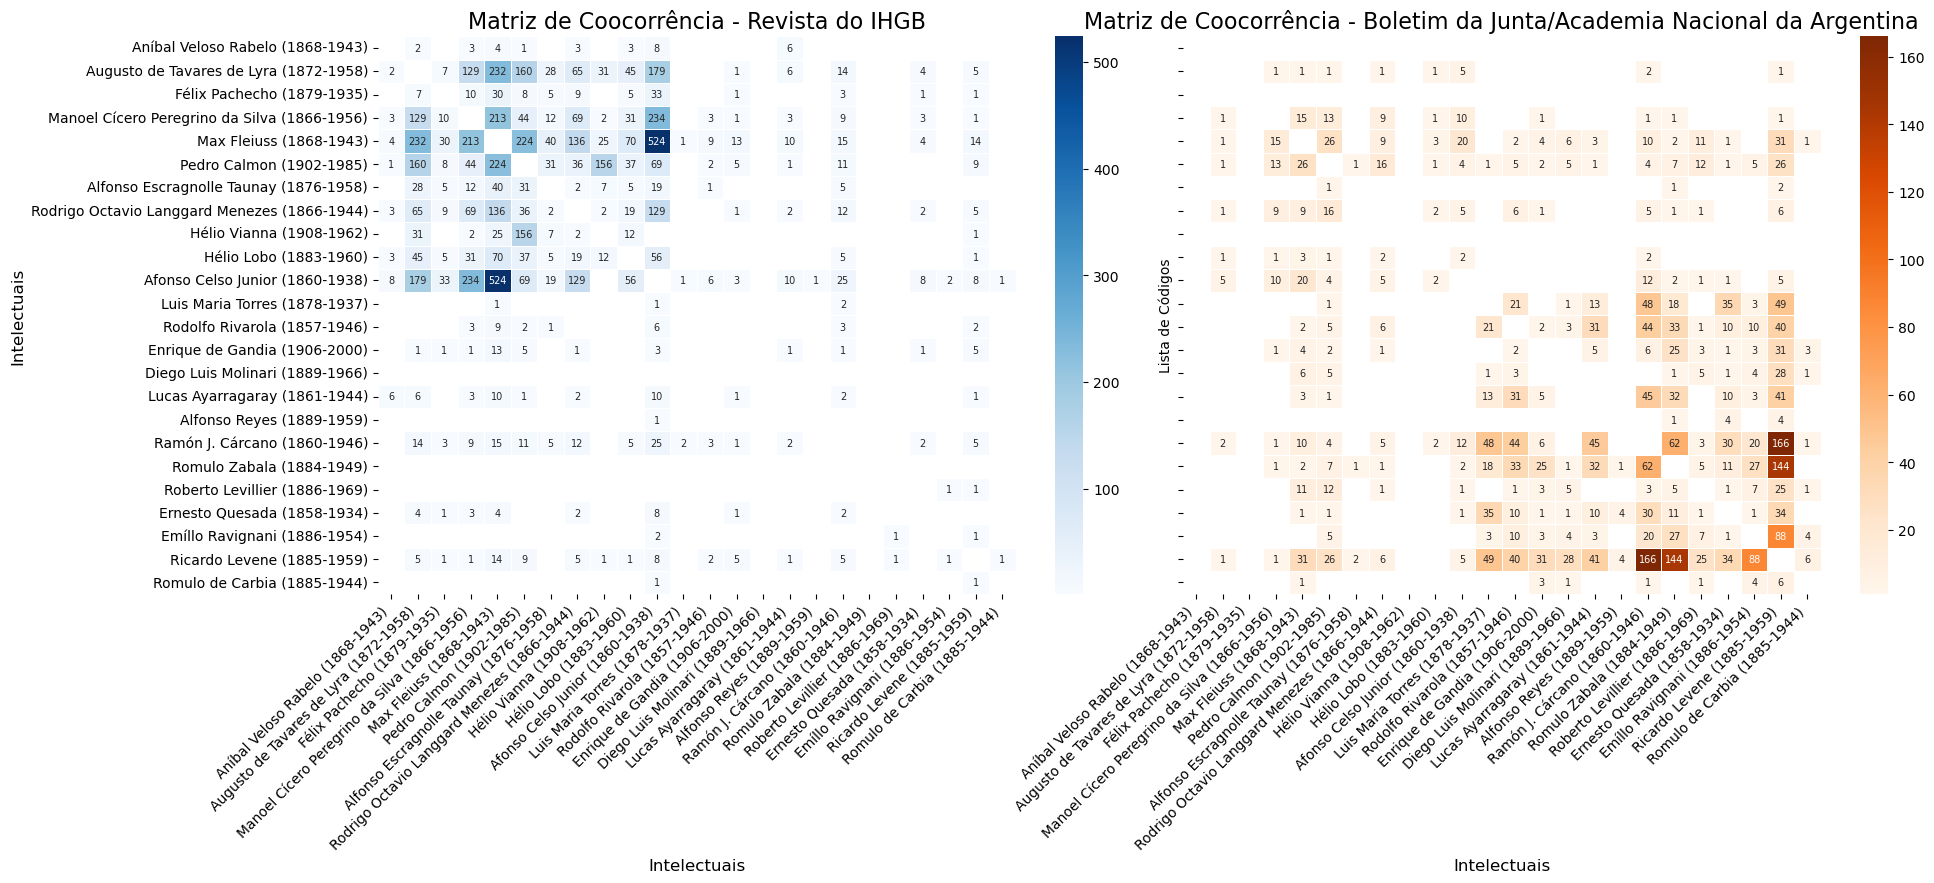

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados
ihgb_path = 'IHGB.xlsx'
junta_academia_path = 'Junta-Academia.xlsx'

ihgb_df = pd.read_excel(ihgb_path)
junta_academia_df = pd.read_excel(junta_academia_path)

# Separar as matrizes de coocorrência
matrix_ihgb = ihgb_df.set_index('Lista de Códigos').drop(columns='Source', errors='ignore')
matrix_junta = junta_academia_df.set_index('Lista de Códigos').drop(columns='Source', errors='ignore')

# Garantir que os valores sejam numéricos
matrix_ihgb = matrix_ihgb.apply(pd.to_numeric, errors='coerce')
matrix_junta = matrix_junta.apply(pd.to_numeric, errors='coerce')

# Substituir valores 0 por NaN para ocultá-los no heatmap
matrix_ihgb = matrix_ihgb.replace(0, np.nan)
matrix_junta = matrix_junta.replace(0, np.nan)

# Plotar os heatmaps lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Heatmap IHGB
sns.heatmap(
    matrix_ihgb,
    cmap='Blues',
    annot=True,
    fmt=".0f",
    annot_kws={"size": 7},
    linewidths=.5,
    ax=axes[0],
    mask=matrix_ihgb.isna(),
    xticklabels=matrix_ihgb.columns,
    yticklabels=matrix_ihgb.index
)
axes[0].set_title('Matriz de Coocorrência - Revista do IHGB', fontsize=16)
axes[0].set_xlabel('Intelectuais', fontsize=12)
axes[0].set_ylabel('Intelectuais', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')

# Heatmap Junta-Academia
sns.heatmap(
    matrix_junta,
    cmap='Oranges',
    annot=True,
    fmt=".0f",
    annot_kws={"size": 7},
    linewidths=.5,
    ax=axes[1],
    mask=matrix_junta.isna(),
    xticklabels=matrix_junta.columns,
    yticklabels=matrix_junta.index
)
axes[1].set_title('Matriz de Coocorrência - Boletim da Junta/Academia Nacional da Argentina', fontsize=16)
axes[1].set_xlabel('Intelectuais', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')

# Ajustar espaçamento
plt.tight_layout()
plt.subplots_adjust(bottom=0.4, wspace=0.01)  # Diminui o espaço horizontal entre gráficos

# Mostrar os gráficos
plt.show()
